# Module 1: Introduction to Exploratory Analysis 

## Overview

Welcome to the first notebook! In this notebook, we start exploring our [Kiva](https://www.kiva.org/) dataset. The goal of exploratory analysis is to summarize the main characteristics of a data set, with the belief that it may lead to new hypotheses that inform algorithm choice and experimentation. Exploratory analysis happens before formal modelling commences, and is extremely important for helping inform or sharpen your hypothesis.

So what is a hypothesis? At the initial stage a [hypothesis](http://study.com/academy/lesson/what-is-a-hypothesis-definition-lesson-quiz.html) is an educational guess that can be tested. The main goal of exploratory analysis is helping us arrive at better hypotheses.

## Step 1: Import and Merge Data

At the beginning of our notebooks we always import all the libraries we will use.

In [1]:
import pandas as pd
import numpy as np
from ggplot import *
import matplotlib.pyplot as plt
from datetime import datetime
import dateutil.parser
pd.options.display.mpl_style = 'default'

# the matplotlib inline command is important, it tells jupyter notebook to show the output of the cell for charts
%matplotlib inline

/home/ckibet/lustre/miniconda2/envs/moringa/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/ckibet/lustre/miniconda2/envs/moringa/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/home/ckibet/lustre/miniconda2/envs/moringa/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/home/ckibet/lustre/miniconda2/envs/moringa/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2847: FutureWarning: 
mpl_style had been deprecated and w

You are using Jupyter notebook to run your code. it is an incredibly versatile tool and we can tailor the configurations to suit our preferences. For example, in the cell below we tell Jupyter to output the results of all commands in a cell (the default is only to output the results of the last command). For more interesting and incredibly useful Jupyter tricks take a look at [this](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/) blog post. Using Jupyter shortcuts will help you work faster. Some valuable shortcuts have been put together in [this](http://www.math.umassd.edu/~ahausknecht/aohWebsiteSpring2017/examples/pythonExamples/downloads/docs/JuypterKeyboardShortcutsV1Sp2016.pdf) great pdf.

In [2]:
# the command below means that the output of multiple commands in a cell will be output at once.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

We use a pandas command to tailor how the data is presented in the command below. There are 76 columns in our final Kiva dataset. The default panda settings hide some of the columns. We make all columns visible by setting the display to 80.

In [3]:
# the command below tells jupyter to display up to 80 columns, this keeps everything visible
pd.set_option('display.max_columns', 80)
pd.set_option('expand_frame_repr', True)

We will use three main data sets: loans_full.csv, loans_details.csv, loans_partner_details.csv. These are all datasets KIVA makes publically available through its API. Wondering what an API is and how we pulled this data? Don't worry, you can learn all about it in the introduction to the KIVA APIs jupyter notebook we put together. It is available on the Delta Analytics GitHub.

Let's start by talking a little about each data set:

[loans_full](http://build.kiva.org/api#GET*|loans|search): contains all successful and expired loans made by KIVA in Kenya. KIVA does not make public loans that have defaulted in order to protect the privacy of those users.

[loans_details](http://build.kiva.org/api#GET*|loans|:ids): contains many of the coumns as loans full. However, it also contains a comprehensive description of the lender.

[loans_partner_details](http://build.kiva.org/api#GET*|partners|:ids): detailed performance metrics associated with each partner. Includes name of partner, rating of partner, amount lent to partner so far. Note that a partner may not necessarily only be operating in Kenya, so the total loan amounts and number of loans may not match with the aggregate amounts in loan_details or loan_ful.


When we import all out data sets we will also import a data dictionary with definitions of each field. We talk about the data dictionary more below.

We set the path below, you should change this path to whatever folder you save the data you download from the google drive [here](https://drive.google.com/drive/folders/0BzVUQjOmkeDIYnhCalBkRVRNY1k?usp=sharing) into.

In [2]:
data_path = '../../data'

We import all three data sets in the cell below.

In [5]:
loans_full=pd.read_csv(data_path+'/loans_full.csv', low_memory=False)
loans_details=pd.read_csv(data_path+'/loans_details.csv', low_memory=False)
loan_partner_details=pd.read_csv(data_path+'/loans_partner_details.csv', low_memory=False)

We will also import our data dictionary which contains the definition for each of the fields in the final data set we will use. Reference the data dictionary for important context about the data. It may be easier to open it as a csv file in your desktop.

In [6]:
kiva_data_dictionary=pd.read_csv(data_path+'/kiva_data_dictionary.csv')

In the cell below we perform a very important piece of code. We merge our datasets together in order to have a single final dataset. You will often have to merge/join datasets because many databases are relational databases. This means data is stored in tables that can be accessed and/or reassembled in many different ways (you can learn more [here](http://searchsqlserver.techtarget.com/definition/relational-database)). This has important benefits:
- allowing the flexible addition of new data without exsisting tables needing to be altered
- limiting the size of the data we store

Instead of having one single huge table in our database, we have many different tables that we can piece together as needed. This act of piecing together datasets is called a merge.


So when does it make sense to merge data?

In order to merge data, you need to have a columns in both datasets that have shared values. The columns you use to perform the join are called "join keys."

For example, the join key in both loans_full and loans_details is the id. This is the unique identifier for a loan and is shared between both datasets. In both datasets this is a unique key, which means we only expect a single row for every row (no duplicates).

The join key between loans_full and loans_partner_details is the partner_id. This is unique in loans_partner_details (every row is a unique partner_id), but is not unique in loans_full since many rows (loans) belong to the same partner. We can show that is not unique below by doing a value_count of the number of loans that belong to each partner_id in loans_full. We show the top 10 loan partners by size, you can see that the top loan partner '133' has been involved in 28,560 loans. When we join loans_full to loans_partner_details we can associate a name with each number identifier, and it will be a lot more interesting.



In [7]:
loans_full['partner_id'].value_counts().nlargest(10)

133.0    28560
164.0    21552
138.0    18101
156.0    18081
202.0    10356
142.0     5922
388.0     3210
203.0     2987
386.0     2388
6.0       1102
Name: partner_id, dtype: int64

Back to how to join! There are actually a few different types of merges, and the type of merge you choose depends upon what data you want to keep in your final data set.

There are two fantastic blog posts which do a great job explaining the different types of merges [here](http://www.datacarpentry.org/python-ecology-lesson/04-merging-data/) and [here](https://blog.codinghorror.com/a-visual-explanation-of-sql-joins/). We will reference the language in both posts below to add intuition.


**inner join** 

We will be using an inner join to join loans_full and loans_details because we only want the rows that match in both the original dataframes.

Inner joins yield a DataFrame that contains only rows where the value being joins exists in BOTH tables. The venn diagram below shows what is kept from both data frames.

![Visual of an inner join](module_1_images/inner_join.png)

Below we test it in python using our two datasets, loans_full and loan_difference.

loans_full and loan_difference contain many columns that are duplicates (exist in both). There is no need to merge all the columns so we start out by figuring out what additional columns ARE in loans_details that ARE NOT in loans_full. We can see below that only borrower_count is additional, so we only merge these two columns.

In [8]:
additional_columns = loans_full.columns.difference(loans_details.columns).tolist() + ['id']
print(additional_columns)

['borrower_count', 'id']


Finally, we are ready to merge. We do not need to specify inner join since it is the default option. However, we do need to specify what are the join keys in each data set. In this case the naming is the same in both datasets, so we specify 'id' as the join key for the loans_details data set and 'id' for the loans_full data set.

In [ ]:
df = loans_details.merge(loans_full[['borrower_count', 'id']], left_on='id', right_on='id')

You can take a look at the output below and confirm that borrow_count is now there. The new dataframe only contains loans that are in both loans_full and loans_details.

In [406]:
# The sample() function takes a random sample from the specified data frame. 
df.sample(3)

,Unnamed: 0,activity,basket_amount,bonus_credit_eligibility,borrowers,currency_exchange_loss_amount,description.languages,description.texts.en,description.texts.es,description.texts.fr,description.texts.ru,funded_amount,funded_date,id,image.id,image.template_id,journal_totals.bulkEntries,journal_totals.entries,lender_count,loan_amount,location.country,location.country_code,location.geo.level,location.geo.pairs,location.geo.type,location.town,name,partner_id,payments,planned_expiration_date,posted_date,sector,status,tags,terms.disbursal_amount,terms.disbursal_currency,terms.disbursal_date,terms.loan_amount,terms.local_payments,terms.loss_liability.currency_exchange,terms.loss_liability.currency_exchange_coverage_rate,terms.loss_liability.nonpayment,terms.repayment_interval,terms.repayment_term,terms.scheduled_payments,themes,translator.byline,translator.image,use,video.id,video.thumbnailImageId,video.title,video.youtubeId,borrower_count
6068,6068,Home Energy,NaN,False,"[{'first_name': 'Pamela', 'last_name': '', 'ge...",NaN,['en'],"Hello Kiva Community! <br /><br />Meet Pamela,...",NaN,NaN,NaN,50,2017-02-09T21:37:45Z,1233734,2435403,1,0,0,2,50,Kenya,KE,town,0.566667 34.566667,point,Bungoma,Pamela,156.0,[],2017-03-11T21:10:02Z,2017-02-09T21:10:02Z,Personal Use,funded,"[{'name': '#Eco-friendly'}, {'name': '#Technol...",4000.0,KES,2017-02-06T08:00:00Z,50,[],shared,0.1,lender,NaN,7,[],"['Green', 'Earth Day Campaign']",NaN,NaN,to buy a solar lantern.,NaN,NaN,NaN,NaN,1
24347,24333,Food Market,NaN,True,"[{'first_name': ' \tPatricia ', 'last_name': '...",NaN,['en'],Patricia is a married mother of three children...,NaN,NaN,NaN,200,2016-04-04T15:28:14Z,1046253,2137311,1,0,0,6,200,Kenya,KE,town,1 38,point,Likoni,Patricia,164.0,[],2016-05-01T20:00:06Z,2016-04-01T20:00:06Z,Food,funded,"[{'name': '#Woman Owned Biz'}, {'name': '#Pare...",20000.0,KES,2016-03-28T07:00:00Z,200,[],shared,0.1,lender,NaN,14,[],NaN,NaN,NaN,"to purchase bundles of wheat flour, maize flou...",NaN,NaN,NaN,NaN,1
77061,77009,Food Production/Sales,NaN,True,"[{'first_name': 'Ruita', 'last_name': '', 'gen...",NaN,['en'],Ruita is a married woman with two school-going...,NaN,NaN,NaN,125,2013-09-10T16:45:51Z,604045,1425246,1,0,0,5,125,Kenya,KE,town,1 38,point,Voi,Ruita,164.0,[],2013-10-10T11:00:02Z,2013-09-10T11:00:02Z,Food,funded,[],10000.0,KES,2013-08-23T07:00:00Z,125,[],shared,0.1,lender,NaN,11,[],NaN,Kyla Evans,2320957.0,to purchase potatoes and cooking oil.,NaN,NaN,NaN,NaN,1


**left join**

Now we perform a different type of merge in order to incorporate the loan_partner_details dataset. This merge is called a left join. The description below is directly from [this](http://www.datacarpentry.org/python-ecology-lesson/04-merging-data/) blog post.

Like an inner join, a **left join** uses join keys to combine two DataFrames. Unlike an inner join, a left join will return all of the rows from the left DataFrame, even those rows whose join key(s) do not have values in the right DataFrame. Rows in the left DataFrame that are missing values for the join key(s) in the right DataFrame will simply have null (i.e., NaN or None) values for those columns in the resulting joined DataFrame.

Note: a left join will still discard rows from the right DataFrame that do not have values for the join key(s) in the left DataFrame.

The venn diagram below shows what is kept from both data frames.

![Visual of an left join](module_1_images/left_join.png)

What this means is that we will keep our entire df dataframe, and we will only pull in data from loan_partner_details of the partner_id for partner_id listed in df. We will discard everything else. The code below goes through how this is done.

In the cell below, we rename all the columns in loans_partner_details with the prefix partner in order to avoid confusion once we merge. Then we list all columns that are in loans_partner_details but not in df. These are the new columns we want to merge. Finally, we do a left join.

A left join is performed in pandas by calling the same merge function used for inner join, but using the how='left' argument.

In [407]:
new_names = [(i,'partner_'+i) for i in loan_partner_details.iloc[:, 1:].columns.values]
loan_partner_details.rename(columns = dict(new_names), inplace=True)

In [408]:
additional_columns = loan_partner_details.columns.difference(df.columns).tolist() + ['partner_id']
print(additional_columns)

['partner_average_loan_size_percent_per_capita_income', 'partner_charges_fees_and_interest', 'partner_countries', 'partner_currency_exchange_loss_rate', 'partner_default_rate', 'partner_default_rate_note', 'partner_delinquency_rate', 'partner_delinquency_rate_note', 'partner_image.id', 'partner_image.template_id', 'partner_loans_at_risk_rate', 'partner_loans_posted', 'partner_name', 'partner_portfolio_yield', 'partner_portfolio_yield_note', 'partner_profitability', 'partner_rating', 'partner_social_performance_strengths', 'partner_start_date', 'partner_status', 'partner_total_amount_raised', 'partner_url', 'partner_id']


In [409]:
df = df.merge(loan_partner_details[['partner_average_loan_size_percent_per_capita_income', 
                                    'partner_charges_fees_and_interest', 'partner_countries', 
                                    'partner_currency_exchange_loss_rate', 'partner_default_rate', 
                                    'partner_default_rate_note', 'partner_delinquency_rate', 'partner_delinquency_rate_note', 
                                    'partner_image.id', 'partner_image.template_id', 'partner_loans_at_risk_rate', 'partner_loans_posted', 
                                    'partner_name', 'partner_portfolio_yield', 'partner_portfolio_yield_note', 'partner_profitability', 
                                    'partner_rating', 'partner_social_performance_strengths', 'partner_start_date', 'partner_status', 
                                    'partner_total_amount_raised', 'partner_url', 'partner_id']], how='left', left_on='partner_id', right_on='partner_id') 


We have successully merged our dataframe and we are ready to get started with our exploratory analysis. For completness, below is a short description of the other join types you are likely to come across as you work with data.

**full join**

![Visual of an full join](module_1_images/full_join.png)

A full join returns all rows from both datasets even if there is no match. All records will be kept so this join is used when we do not want to lose any data but want to see what rows match.
Invoked by passing how='outer' as an argument. 

**right join**

A right join is the same concept as the left join except it keeps all rows in the right data set rather than the left. Invoked by passing how='right' as an argument. 


We don't want to have to join all our datsets everytime we get started so we save our work to our data folder using the command below.

In [410]:
df.to_csv('~/intro_course_data_science_for_good/data/df.csv')

## Step 2:  Data Cleaning & Creating New Variables

We read in our merged dataset below. In future lessons, we will always import this file instead of having to merge everytime.

In [ ]:
#df=pd.read_csv(data_path+'/df.csv', low_memory=False, encoding = "ISO-8859-1")

In [4]:
df=pd.read_csv(data_path+'/df.csv', low_memory=False)

In the cell below, we take a random sample of 3 rows to get a feel for the data.

In [5]:
df.loc[df['name']=='Salome'].head(1)

,Unnamed: 0,Unnamed: 0.1,activity,basket_amount,bonus_credit_eligibility,borrowers,currency_exchange_loss_amount,description.languages,description.texts.en,description.texts.es,...,partner_name,partner_portfolio_yield,partner_portfolio_yield_note,partner_profitability,partner_rating,partner_social_performance_strengths,partner_start_date,partner_status,partner_total_amount_raised,partner_url
542,542,542,Clothing Sales,0.0,False,"[{'first_name': 'Salome', 'last_name': '', 'ge...",NaN,['en'],Salome is 40 years old and married with 3 chil...,NaN,...,Kenya ECLOF,40.3,NaN,2.54,2.0,"[{'id': 3, 'name': 'Client Voice', 'descriptio...",2014-05-29T13:30:02Z,active,863375.0,http://www.eclof-kenya.org/


A big part of exploratory analysis involves data validation. This means gaining an understanding of the distribution of data, any potential data issues that can affect the quality of your model. As we learnt during our theory lesson, " Data preparation accounts for about 80% of the work of data scientists.” [source](https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/#27df67b36f63).

What does data cleaning look like:

1) Are my variables the right type?

Type is very important in Python programing, because it affects the types of functions you can apply to a series. There are a few different types of data you will see regularly (see [this](https://en.wikibooks.org/wiki/Python_Programming/Data_Types) link for more detail):
* **int** - a number with no decimal places. example: loan_amount field
* **float** - a number with decimal places. example: partner_id field
* **str** - str is short for string. This type formally defined as a sequence of unicode characters. More simply, string means that the data is treated as a word, not a number. example: sector
* **boolean** - can only be True or False. There is not currently an example in the data, but we will be creating a gender field shortly.
* **datetime** - values meant to hold time data. Example: posted_date

2) Is there missing data?

If we have missing data, is the missing data at random or not at random? If data is missing at random, the data distribution is still representative of the population. You can probably ignore the missing values as an inconvienience. However, if the data is missing systematically, any modeling you do may be biased. You should carefully consider the best way to clean the data, it may involve dropping some data. See [here](https://en.wikipedia.org/wiki/Missing_data) for additional information.

3) Sanity check the data, does it match what you expected to find:
- is the range of values what you would expect. For example, are all loan_amounts above 0.
- do you have the number of rows you would expect
- is your data for the date range you would expect. For example, is there a strange year in the data like 1880.
- are there unexpected spikes when you plot the data over time

### Are my variables the right type?

Let's check the type of our variables using the examples we in the cell above.

In [6]:
type_example=df[['loan_amount','partner_id', 'sector','posted_date']]

In [7]:
type_example.sample(3)

,loan_amount,partner_id,sector,posted_date
49865,125,NaN,Retail,2015-02-20T03:12:51Z
82597,500,164.0,Food,2013-04-29T11:20:01Z
117539,900,133.0,Food,2010-12-01T08:00:44Z


In [8]:
type_example['loan_amount'].dtype
type_example['partner_id'].dtype
type_example['sector'].dtype
type_example['posted_date'].dtype

dtype('O')

Immediately, we notice we have an issue. Type 'O' means object which in the pandas world means a string. This makes sense for the sector field but not for the posted_date field. We want pandas to treat this field as a datetime field, we will have to tell pandas to convert it. This is annoying but important because we will be ploting time series charts. We need python to recognize posted_date as a date in order to apply some of the operations necessary.

We use the panda function `to_datetime`, which converts our format from object to datetime. You can run the `.dtype` command above to verify we have converted successfully. We also want to create a YY-MM variable for each, which will allow us to more easily aggregate our data later in the module.

In [9]:
df['posted_datetime'] = pd.to_datetime(df['posted_date'])
df['planned_expiration_datetime'] = pd.to_datetime(df['planned_expiration_date'])
df['funded_datetime'] = pd.to_datetime(df['funded_date'])
df['dispursal_datetime'] = pd.to_datetime(df['terms.disbursal_date'])
df['number_of_loans']=1

In [10]:
df['posted_date']=df['posted_datetime'].dt.date
df['planned_expiration_date']=df['planned_expiration_datetime'].dt.date
df['funded_date']=df['funded_datetime'].dt.date
df['dispersal_date']=df['dispursal_datetime'].dt.date
df['posted_year']=df['posted_datetime'].dt.year
df['posted_month']=df['posted_datetime'].dt.month

In [12]:
#df['posted_my'].head(2)

We can check if we were successful by checking the type again. We were successful!

In [13]:
df['posted_datetime'].head(1)
df['posted_datetime'].dtype

dtype('<M8[ns]')

Now that we have successfully manipulated our data fields we can plot the time range of our data. This is an important piece of sanity checking because if we see an unexpected year, or big spikes in one year we should be suspicious about the quality of our data.

/home/ckibet/lustre/miniconda2/envs/moringa/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


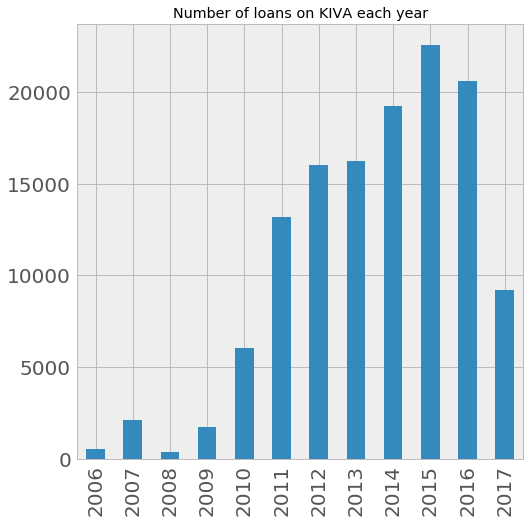

In [14]:
df['posted_year'].value_counts().sort_index().plot(kind='bar',title='Number of loans on KIVA each year', fontsize=20, figsize=(8, 8))

In the chart above we can see that we have loan data from 2006 through to 2017. This seems reasonable and means KIVA has been lending in Kenya for 11 years. We also see that although the number of loans has grown each year there is a dip in 2017. However, this isn't that suspicious because remember that we are only in May, so the total volume will likely increase by December. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

/home/ckibet/lustre/miniconda2/envs/moringa/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


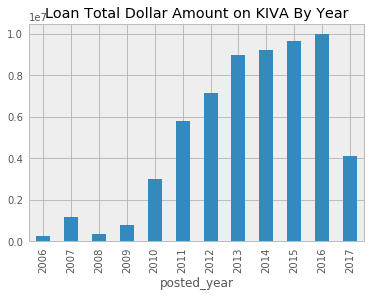

In [15]:
df.groupby('posted_year')['loan_amount'].sum().plot(kind="bar", title='Loan Total Dollar Amount on KIVA By Year')
plt.xticks(rotation=90)

We see a similar patten in the sum of dollars loaned. It mimics the distribution of the number of loans which is a good sign.

### Do I have missing values?

Remember when we used a left join to merge in the partner data. That means we could have null (missing) values in our partner_id field. We check this in the cell below and find that we have 9,642 loans that are missing. Let's investigate and try and understand whether the data is missing at random or systematically missing.

In [16]:
len(df.index)-df['partner_id'].count()

9642

In [17]:
null_partner_id=df.loc[df['partner_id'].isnull()]

In [18]:
len(null_partner_id.index)

9642

In [19]:
null_partner_id.head(2)

,Unnamed: 0,Unnamed: 0.1,activity,basket_amount,bonus_credit_eligibility,borrowers,currency_exchange_loss_amount,description.languages,description.texts.en,description.texts.es,...,partner_total_amount_raised,partner_url,posted_datetime,planned_expiration_datetime,funded_datetime,dispursal_datetime,number_of_loans,dispersal_date,posted_year,posted_month
36064,36064,36048,Health,NaN,False,"[{'first_name': 'Doroffine', 'last_name': '', ...",0.01,['en'],"I grew up in Kitui county, was faced with many...",NaN,...,NaN,NaN,2015-09-02 17:52:12,2015-10-17 10:52:11,2015-09-04 02:44:28,2015-09-14 11:07:00,1,2015-09-14,2015,9
36068,36068,36052,Agriculture,NaN,False,"[{'first_name': 'Brenda Bugutsa', 'last_name':...",0.01,['en'],I grew up in Vihiga county Western Kenya in a ...,NaN,...,NaN,NaN,2015-09-02 17:44:11,2015-10-17 10:44:09,2015-09-03 15:10:11,2015-09-10 16:23:00,1,2015-09-10,2015,9


It seems that the number of loans peaked in 2014, and has decreased. All of the loans issued in the second half of 2015, 2016, 2017 have a partner. This tells us these values are not missing at random, they are more likely to occur in data before June 2015, and are most likely to occur in the first half of 2014. We should probably just drop data with the partner_id missing. We do so below using the notnull() function which checks if the field is populated.

In [20]:
df=df.loc[df['partner_id'].notnull()]

As a sanity check that our filtering was correctly done we check the new number of rows. It makes sense!

In [21]:
len(df.index)

118316

In [22]:
df.to_csv('../../data/df.csv')

### Additional Sanity Checks

**Does the dataset have the number of rows you would expect?**

In the command below we find out the number of loans and number of columns by using the function shape. You can also use len(df.index) to find the number of rows.

In [23]:
print('There are %d observations and %d features' % (df.shape[0],df.shape[1]))

There are 118316 observations and 85 features


This tells us there are 118,316 observations and 84 features. We learnt in the theory lesson that each row is an observation and each column is a potential feature. 118,000 matches with what we expect based upon our conversations with Kiva. This is a very healthy sample size for applying machine learning algorithms.

### Descriptive statistics of the dataset

In the theory part of the lesson, we learnt about mean, frequency and percentiles as a powerful way to understand the distribution of the data. If you are unfamiliar with these terms or need a refresher [this](https://www.mathsisfun.com/data/frequency-grouped-mean-median-mode.html) overview should be helpful.The describe command below provides key summary statistics for each numeric column.

In [25]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,basket_amount,currency_exchange_loss_amount,funded_amount,id,image.id,image.template_id,journal_totals.bulkEntries,journal_totals.entries,...,partner_image.template_id,partner_loans_at_risk_rate,partner_loans_posted,partner_portfolio_yield,partner_portfolio_yield_note,partner_profitability,partner_total_amount_raised,number_of_loans,posted_year,posted_month
count,118316.000000,118316.000000,944.000000,15690.000000,118316.000000,1.183160e+05,1.183160e+05,118316.0,118316.0,118316.0,...,118316.0,118316.000000,118316.000000,111917.000000,0.0,106890.000000,1.183160e+05,118316.0,118316.000000,118316.000000
mean,64433.371843,64398.230239,0.185381,7.017447,473.439771,7.096035e+05,1.540915e+06,1.0,0.0,0.0,...,1.0,11.528738,18174.752434,31.054133,NaN,2.362943,7.309958e+06,1.0,2013.558783,6.424904
std,38178.638548,38157.158427,2.145937,15.655207,676.663803,3.412929e+05,6.043467e+05,0.0,0.0,0.0,...,0.0,10.893620,9423.900289,10.444965,NaN,11.299052,3.289116e+06,0.0,2.343340,3.559524
min,0.000000,0.000000,0.000000,0.010000,0.000000,2.510000e+02,4.090000e+02,1.0,0.0,0.0,...,1.0,0.000000,0.000000,0.000000,NaN,-117.790000,0.000000e+00,1.0,2006.000000,1.000000
25%,29578.750000,29564.750000,0.000000,1.220000,250.000000,4.202852e+05,1.013473e+06,1.0,0.0,0.0,...,1.0,0.000000,9546.000000,29.000000,NaN,-1.700000,6.764500e+06,1.0,2012.000000,3.000000
50%,66559.500000,66517.500000,0.000000,3.490000,350.000000,6.975760e+05,1.575774e+06,1.0,0.0,0.0,...,1.0,16.058249,18150.000000,33.100000,NaN,0.000000,7.646925e+06,1.0,2014.000000,6.000000
75%,98296.250000,98238.250000,0.000000,8.280000,600.000000,1.003961e+06,2.052755e+06,1.0,0.0,0.0,...,1.0,18.498507,21415.000000,36.000000,NaN,2.230000,8.133425e+06,1.0,2016.000000,10.000000
max,127957.000000,127899.000000,25.000000,1285.510000,50000.000000,1.292273e+06,2.516905e+06,1.0,0.0,0.0,...,1.0,100.000000,30794.000000,41.000000,NaN,30.300000,1.136698e+07,1.0,2017.000000,12.000000


In order to get the same summary statistics for categorical columns (string) we need to do a little data wrangling. The first line of code filters for all columns that are a data type object. As we know from before this means they are considered to be a string. The final row of code provides summary statistics for these character fields.

In [26]:
categorical = df.dtypes[df.dtypes == "object"].index
df[categorical].describe()

,activity,borrowers,description.languages,description.texts.en,description.texts.es,description.texts.fr,description.texts.ru,funded_date,location.country,location.country_code,...,video.youtubeId,partner_charges_fees_and_interest,partner_countries,partner_name,partner_rating,partner_social_performance_strengths,partner_start_date,partner_status,partner_url,dispersal_date
count,118316,118316,118316,113988,3,3,4,112704,118316,118316,...,76,118316,118316,118316,118316,113754,118316,118316,114249,118316
unique,149,29987,4,113859,3,3,4,3452,1,1,...,74,2,11,52,9,16,52,3,34,3081
top,Farming,"[{'first_name': 'Anonymous', 'last_name': '', ...",['en'],"Hello Kiva Community! <br /><br />Meet Jane, w...",The person appearing in the photo is Agnes. Sh...,Irine has a small farm in Sigowet village wher...,Jane is a Kiva borrower. She has 5 children. S...,2016-03-08,Kenya,KE,...,6dWFtYShzBk,True,"[{'iso_code': 'KE', 'region': 'Africa', 'name'...",VisionFund Kenya,3.5,"[{'id': 1, 'name': 'Anti-Poverty Focus', 'desc...",2009-05-29T11:35:11Z,active,http://www.visionfundkenya.co.ke/,2017-02-01
freq,26243,2420,118306,5,1,1,1,413,118316,118316,...,2,117376,106639,28570,39681,46681,28570,104271,28570,2498


In the table above, there are 4 really useful fields: 

1) **count** - total number of fields populated (Not empty). 

2) **unique** - tells us how many different unique ways this field is populated. For example 4 in description.languages tells us there are 4 different language descriptions. 

3) **top** - tells us the most popular data point. For example, the top activity in this dataset is Farming which tells us most loans are in Farming.

4) **freq** - tells us that how frequent the most popular category is in our dataset. For example, 'en' (english) is the language almost all descriptions (description.languages) are written in (118,306 out of 118,316).

One red flag from the table above is the summary statistics for the field location.geo.pairs. It seems that 77,254 loans come from the same latitude and longitude. Given the granularity of coordinates this seems highly unlikely. Let's investigate further. Below we plot the geo coordinate field.

/home/ckibet/lustre/miniconda2/envs/moringa/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


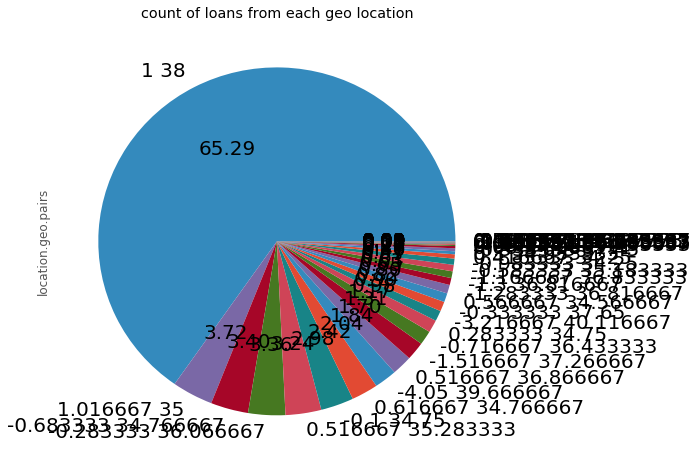

In [27]:
df['location.geo.pairs'].value_counts().plot(kind='pie',title='count of loans from each geo location', autopct='%.2f', fontsize=20, figsize=(8, 8))                                 

This confirms that 65% of all loans seem to be from the same geo coordinates. Seems very strange, but perhaps it is possible. Let's take a look at another field location.town which has the name of the town where the loan is from which should help clarify.

In [ ]:
df['location.town'].value_counts().plot(kind='pie',title='count of loans from each town', autopct='%.2f', fontsize=20, figsize=(8, 8))                         

/home/ckibet/lustre/miniconda2/envs/moringa/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


The messy chart above actually makes a lot more sense given what we would expect! It shows that loans disbursed across many different towns and are not concentrated in a single location. We now suspect there is a data issue with location.geo.pairs. We talk to our partners at Kiva and they confirm that this data field is problematic, we will not use it going forward and will instead use location.town.

## Step 3: Exploratory Analysis

## Step 3 a: What sectors get the most funding?

The pie chart below shows that agriculuture and food have the most loans in Kenya.

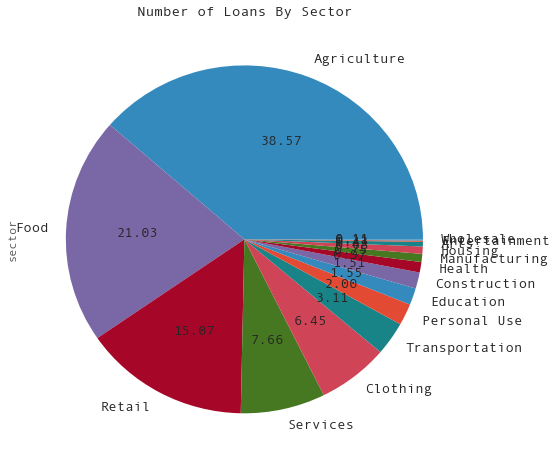

In [314]:
df['sector'].value_counts().plot(kind='pie',title='Number of Loans By Sector',fontsize=14,  autopct='%.2f',figsize=(8, 8))
plt.savefig('module_1_images/sector.png')

What is the average loan amount for each sector? We see that Agriculture has the largest average loan value.

In [41]:
df.groupby('sector')['loan_amount'].mean()

sector
Agriculture        563.734169
Arts               406.397638
Clothing           429.577926
Construction       439.261651
Education          876.895799
Entertainment      476.286765
Food               379.565182
Health            1031.538797
Housing            512.875000
Manufacturing      546.231721
Personal Use       242.357294
Retail             490.601514
Services           452.595146
Transportation     514.767473
Wholesale          590.485075
Name: loan_amount, dtype: float64

We can also visualize this as a bar chart. The chart below shows that on average Health care and Education loans have the highest amounts. The average health care loan is over $1000 for example.

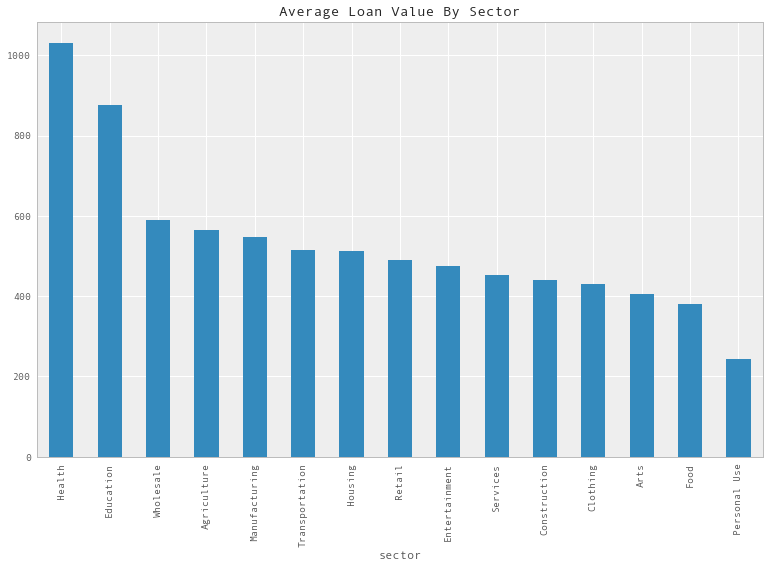

In [316]:
df.groupby('sector')['loan_amount'].mean().nlargest(20).plot(kind="bar", title="Average Loan Value By Sector",figsize=(13, 8))

Below, we plot the total amount of dollars in each sector. Agriculture still comes out on top.

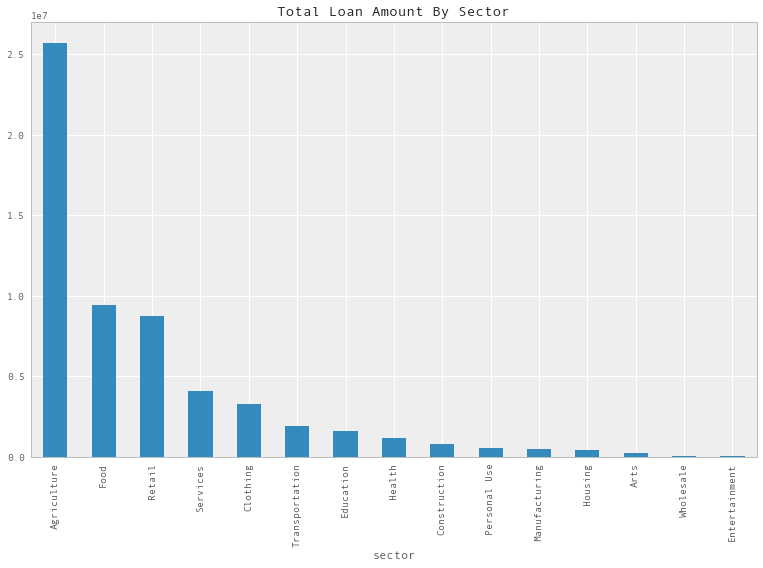

In [317]:
df.groupby('sector')['loan_amount'].sum().nlargest(20).plot(kind="bar", title="Total Loan Amount By Sector", figsize=(13, 8))

We can also look at the distribution of loans by sector.

There are 149 different activities

 Looking at the number of loans by the top 15 activites


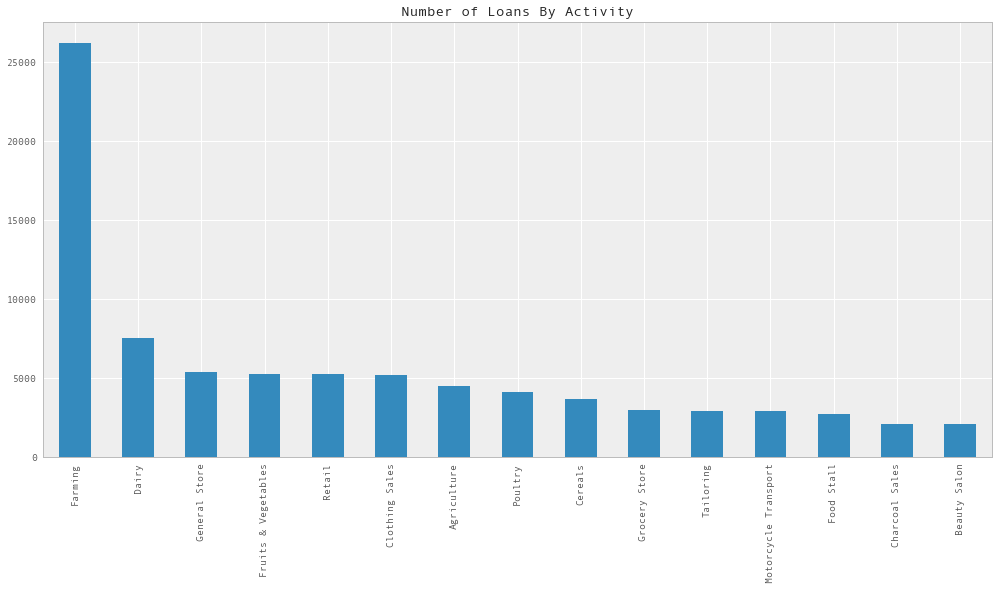

In [319]:
print("There are %d different activities" % df.activity.value_counts().size)
print("\n Looking at the number of loans by the top 15 activites")
df.activity.value_counts().nlargest(15).plot(kind='bar',figsize=(17,8), title="Number of Loans By Activity")
plt.savefig('module_1_images/activity.png')

Since we know agriculture loans tend to be larger on average, it would be interesting to see if they tend to have more borrowers.

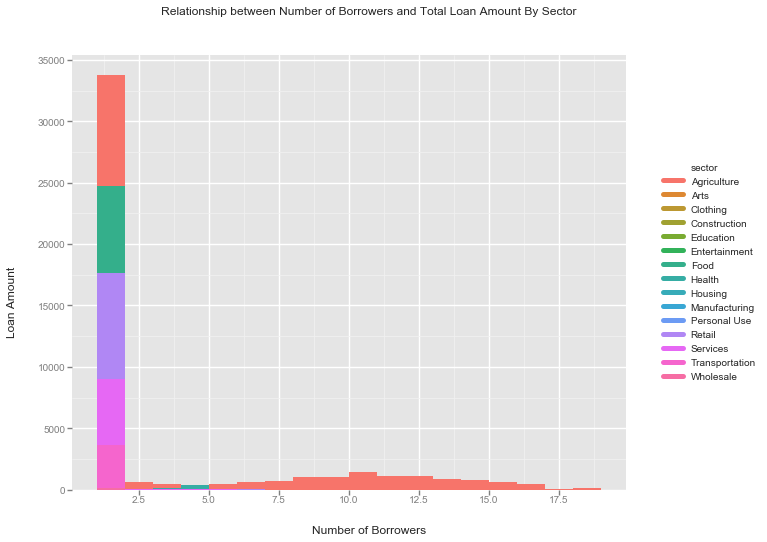

<ggplot: (-9223372036452980522)>

In [274]:
ggplot(df[df['borrower_count'] < 20], aes(x='borrower_count', fill='sector')) +\
    geom_histogram(binwidth=1) + \
ggtitle("Relationship between Number of Borrowers and Total Loan Amount By Sector") + xlab("Number of Borrowers") + ylab("Loan Amount")

We were right, this was worth investigating. We see that the bulk of all loans only have a single borrower, but agriculture loans tends to be outliers and much more likely to have multiple borrowers.

To get a feel of the difference between sectors, we can look a description using the code below.

In [337]:
df[df['sector']=='Food'].iloc[0][8]

'Meet this enterprising woman, Emily. She resides in a remote part of Bomet County. She loves being of service to her community, and that explains the reason why she is regarded as one of the most influential women in her village. <br /><br />Emily is loved, not only for the immense knowledge she has in agriculture, but also for her polite nature, especially in her cereal business. Her customers trust her goods and services, and this gives her the ability to create a sale more easily than any other businesswoman in her area.   <br /><br />Emily has been inspired by the activities of Juhudi Kilimo in its move to eliminate rural poverty by elevating the life of the rural smallholder farmer. She is now borrowing this loan so that she can buy more cereals for her business and continue making profits. The profit she makes will be saved to be used in educating her children,'

## Step 3 b: Who are the biggest lending partners?

In this section, we gain an understanding of KIVA's partners on the ground and how important they are to the work KIVA does.

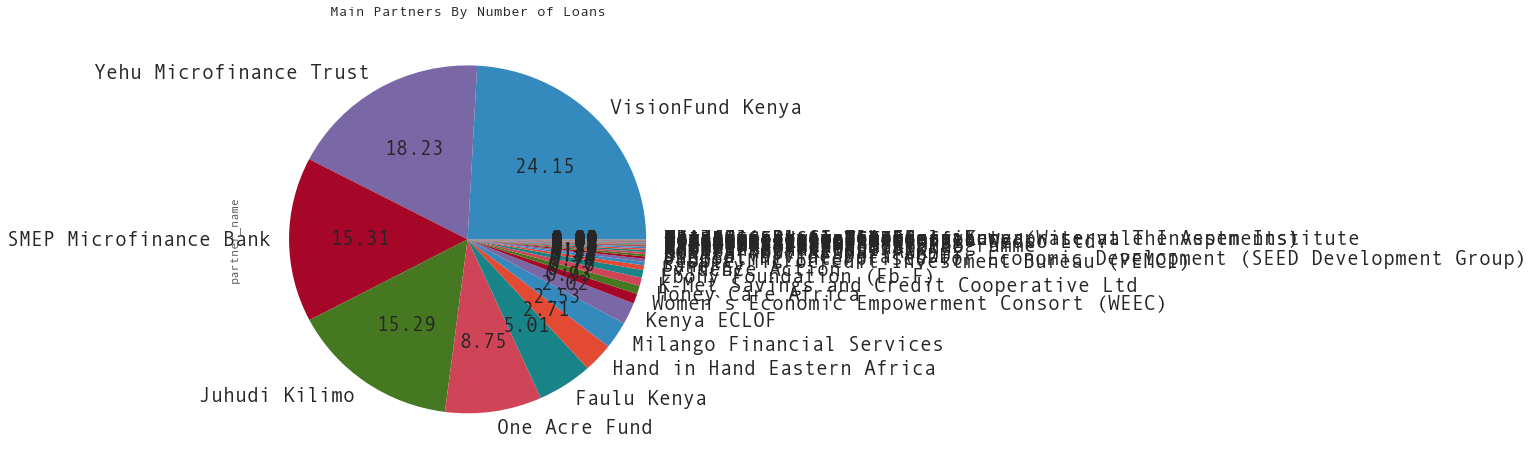

In [298]:
df['partner_name'].value_counts().plot(kind='pie',title='Main Partners By Number of Loans', autopct='%.2f', fontsize=20, figsize=(8, 8))

From the chart above we can see that just a few loaning partners are dominating the loan market in Kenya. The biggest loaning partner VisionFund Kenya has responsible for close to one quarter of all loans in Kenya. 

We can also look at the top lending partners in terms of the total number of dollars loaned. This chart is a more than a little messy (we have a cleaner bar chart below), but it shows that some previously small loan partners like One Acre Fund are much bigger when you consider the dollars funded. This is probably because One Acre Fund operates in the agriculture sector which we know from analysis earlier in the notebook to be the top sector in terms of dollars funded.

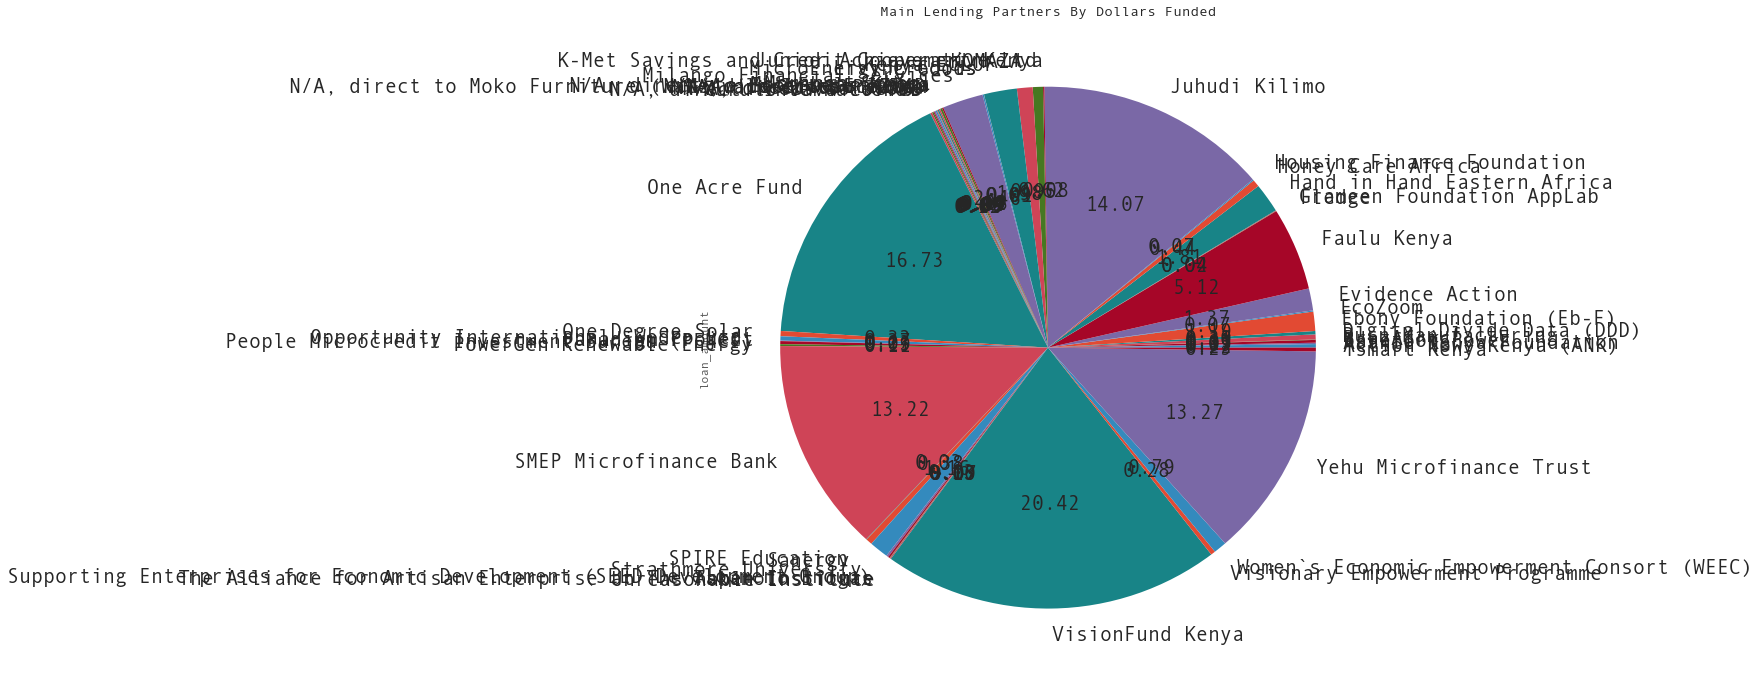

In [286]:
df.groupby('partner_name')['loan_amount'].sum().plot(kind='pie',title='Main Lending Partners By Dollars Funded',autopct='%.2f', fontsize=20, figsize=(12, 12))

In [358]:
df.groupby('partner_name')['loan_amount'].sum().nlargest(15)

partner_name
VisionFund Kenya                               11960875
One Acre Fund                                   9800175
Juhudi Kilimo                                   8245775
Yehu Microfinance Trust                         7774375
SMEP Microfinance Bank                          7746150
Faulu Kenya                                     2998575
Milango Financial Services                      1440700
Kenya ECLOF                                     1162850
Hand in Hand Eastern Africa                     1059875
Evidence Action                                  799950
Ebony Foundation (Eb-F)                          697975
Strathmore University                            677125
KOMAZA                                           554800
Women`s Economic Empowerment Consort (WEEC)      463325
K-Met Savings and Credit Cooperative Ltd         361650
Name: loan_amount, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

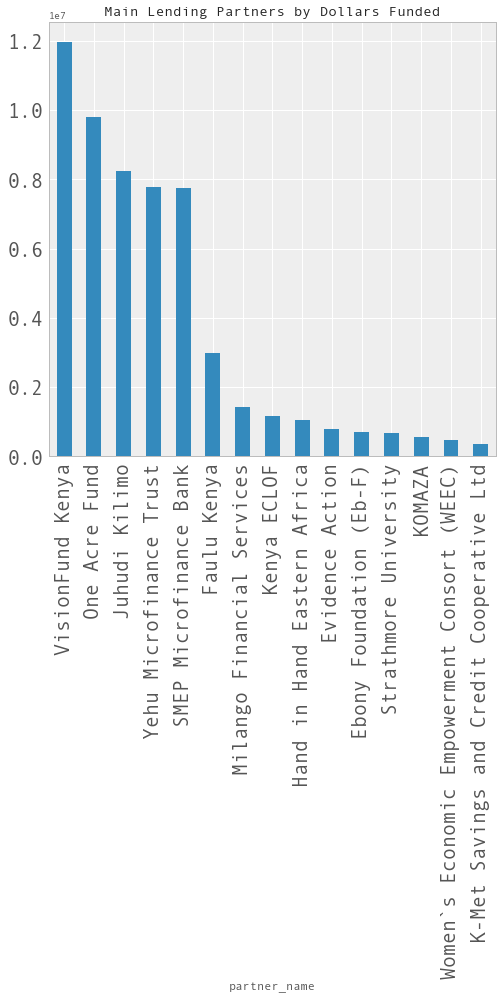

In [359]:
df.groupby('partner_name')['loan_amount'].sum().nlargest(15).plot(kind="bar", y="loan_amount", title='Main Lending Partners by Dollars Funded', fontsize=20, figsize=(8, 8))
plt.xticks(rotation=90)
plt.savefig('module_1_images/partner.png', bbox_inches='tight', 
               pad_inches=3)

## Step 3 c: How many loans do not get funded? What are some qualities of loans that expire?

The chart below shows us that 95% of all loans get funded. This is actually a suprisingly high amount. Why? Think about the % of all loan applications a traditional bank approves, it is very unlikely to be close to 100%. Because we were surprised by the data, we confirmed the number with the KIVA team. This was consistent with their own understanding of the data with means that only 4% of loans posted to KIVA in Kenya do not get funded.

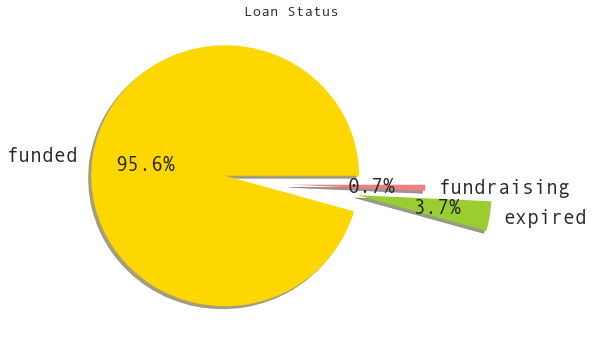

In [416]:
labels = 'funded', 'expired', 'fundraising'
sizes = [112704, 4668, 944]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.5, 0.5, 0, )  # explode 1st and 2nd slice
df['status'].value_counts().plot(kind='pie',title='Loan Status', colors=colors, autopct='%1.1f%%',
                                explode=explode, labels=labels, shadow=True, fontsize=20, figsize=(6, 6))

### What are some qualities of loans that expire?

We suspect that the loan amount may have something to do with the reason a loan expires.The chart below shows a strong relationship between loan amount and number of lenders. This suggests to us that as the loan amount goes up the amount donated by any lender does not. Instead larger loans are simply fulfiled by more individual lenders. This makes sense given our understanding of KIVAs platform, since the majority of lenders loan the minimum $25.00. 

The chart below also suggests that larger loans are more likely to expire. We can see this even more clearly when we limit the x range to loans below 2000.

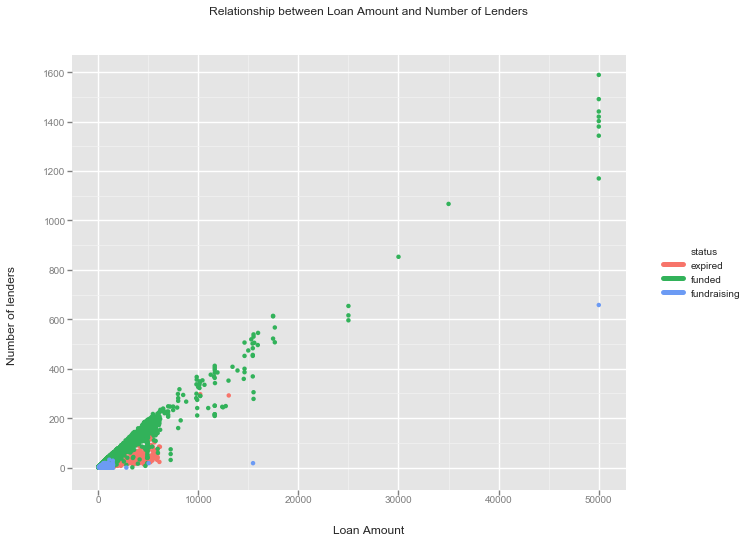

<ggplot: (-9223372036433472340)>

In [291]:
ggplot(df , aes(x = 'loan_amount', y = 'lender_count', color='status')) + geom_point() + \
ggtitle("Relationship between Loan Amount and Number of Lenders") + xlab("Loan Amount") + ylab("Number of lenders")

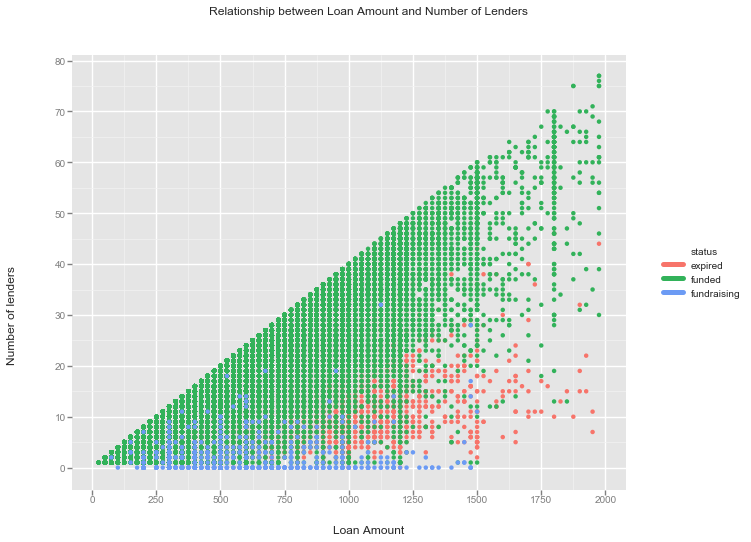

<ggplot: (427648509)>

In [292]:
ggplot(df[df['loan_amount']<2000], aes(x = 'loan_amount', y = 'lender_count', color='status')) + geom_point() + \
ggtitle("Relationship between Loan Amount and Number of Lenders") + xlab("Loan Amount") + ylab("Number of lenders")

That might suggest that larger loans are more difficult to fulfill, since they tend on average to require more lenders. Let's take a look. We start by plotting the distribution of loans for each status in the chart below. We cap the range at 10,000 because of outliers. We can see that most of the funded loans tend to concentrated below 1000 dollars.

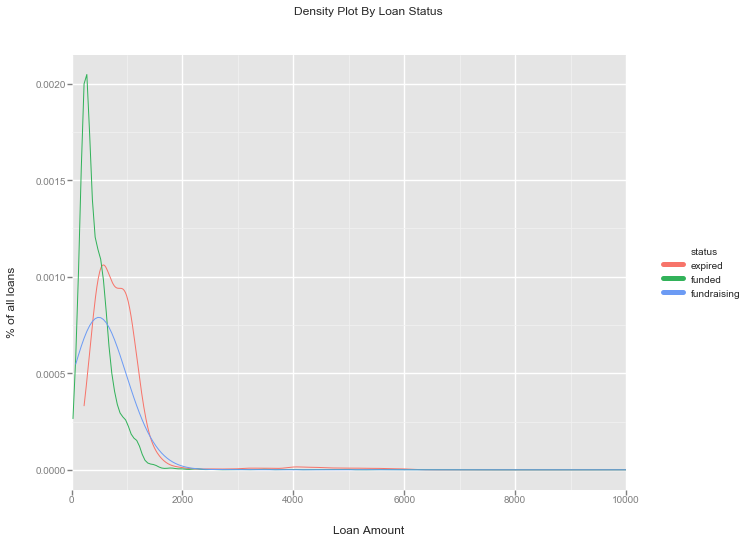

In [364]:
p=ggplot(df, aes(x='loan_amount',colour='status')) + geom_density() + xlim(0,10000) + \
ggtitle("Density Plot By Loan Status") + xlab("Loan Amount") + ylab("% of all loans")

p.save('module_1_images/status.png')

We can take this one step further by using a boxplot below.

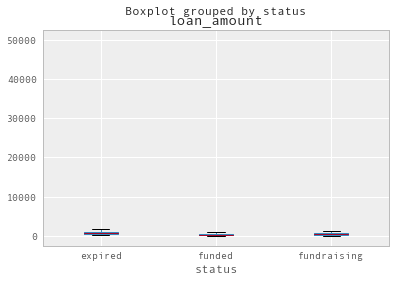

In [280]:
df.boxplot(column='loan_amount', by='status', showfliers=True)

In the box plot above the range is skewed by **outliers**.

An outlier an observation that lies outside the overall pattern of a distribution (from [here](http://mathworld.wolfram.com/Outlier.html)). It is up to you, as a machine learning practitioner, to decide whether these data points are truly abnormal. Outliers should be investigated carefully. They often contain valuable information about data gathering. Before you eliminate outliers consider why they appeared and wether similar values will continue to appear.

**How to indentify outliers?**

Single feature: use a boxplot (just like the one we just did). 

Multiple features: If you are trying to identify outliers in the relationship between two features the easiest way is to use a scatter plot. This allows us to visually see the points that clearly lie away from most of our distribution.

**When to remove outliers**:

1) when outliers are caused by experimental errors (taken directly from [here](http://study.com/academy/lesson/outlier-in-statistics-definition-lesson-quiz.html):

a) Human error (i.e. errors in data entry or data collection)

b) Participants intentionally reporting incorrect data (This is most common in self-reported measures and measures that involve sensitive data, i.e. teens underreporting the amount of alcohol that they use on a survey)

c) Sampling error (i.e. including high school basketball players in the sample even though the research study was only supposed to be about high school track runners)
    
In our case, our outliers are probably not caused by a), b) bur rather c). c) explains our outliers since the features that drive the funding of loans over $5000 are likely to be very different from how loans are funded below this amount. 

We can remove outliers using code like the snippet below (which removes data point more than 3 standard deviations away from the mean).

In [ ]:
# Calculate Outliers
removed_outliers=df[(((df['loan_amount']-df['loan_amount'].mean())/(df['loan_amount'].std())).abs()<3)] 

However, we opt for a simpler approach since we are still doing exploratory analysis and do not want to alter our data set yet. We pass a command showoutliers=False to remove the outliers from the chart. Outliers are defined in this case as anything more 2.6 standard deviations away from the mean. This is not crucial to know, rather understand that this eliminates values at extreme distance from the rest of the distribution.

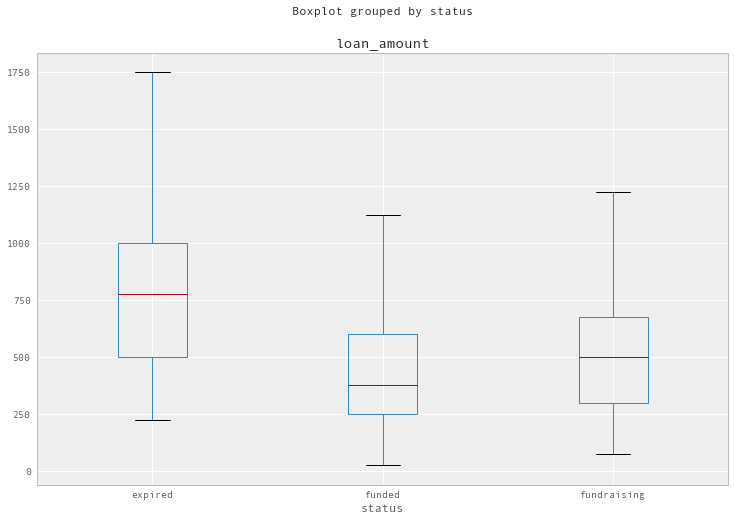

In [365]:
df.boxplot(column='loan_amount', by='status', showfliers=False, figsize=(12,8))

Removing outliers turns out to have been very useful. In the boxplot above we can see that expired loans tend to be higher in amount than funded, meaning that asking for large amounts may make funding more difficult.

## Step 3 d: Are women asking for lower loan amounts than men?

In order to answer this question, we need to know what the gender of each borrower is. This field does not exist as a column in the data but does exist as a nested json field 'borrowers'. We extract the field in the code below to make a new field which is either Male or Female.

In [413]:
df['gender']=np.where(df['borrowers'].apply(lambda x: x.split("gender': '")[1][0]=='M'),"Male",(np.where(df['borrowers'].apply(lambda x: x.split("gender': '")[1][0]=='F'),"Female","")))

Now we can do some exploratory analysis to understand the effect of gender on loan amount.

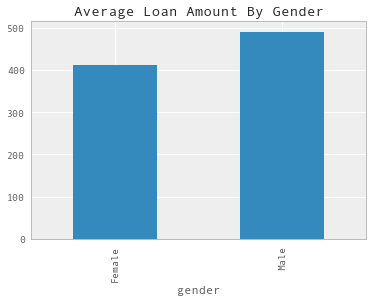

In [369]:
df[df['borrower_count'] == 1].groupby('gender')['loan_amount'].mean().plot(kind="bar", title="Average Loan Amount By Gender")

In [370]:
df[df['borrower_count'] == 1].groupby('gender')['loan_amount'].mean()

gender
Female    412.053819
Male      490.876162
Name: loan_amount, dtype: float64

A more nuanced way to look at this is using a boxplot. Instead of only plotting the mean average it also plots the 25th, 50th and 75th percentile.

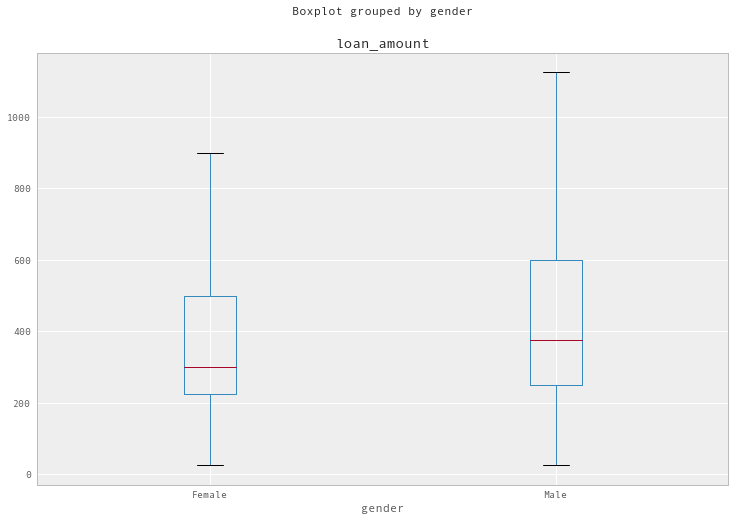

In [371]:
df[(df['borrower_count'] == 1)].boxplot(column='loan_amount', by='gender', showfliers=False, figsize=(12,8))

The chart above shows us some compelling results, suggesting that the distribution of loan amounts requested for mean and women is very different. It shows us at the 25th, 50th and 75th percentile the loan amount requested by women is lower.

The chart below shows that women tend to request more loans than men under 500 dollars whereas men request more loans than women at every value above that amount.

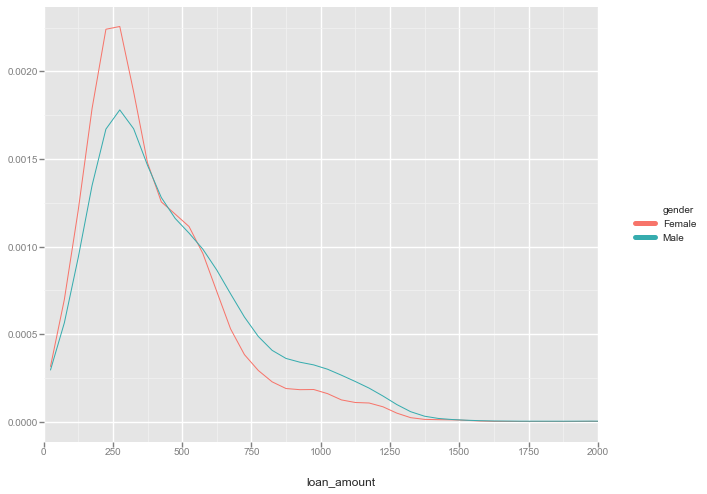

<ggplot: (-9223372036411330097)>

In [375]:
ggplot(df[(df['borrower_count'] == 1)], aes(x='loan_amount',colour='gender')) + geom_density() + xlim(0,2000)

It could be that men are consistently asking for a higher loan amount because of the industry they are in. Let's take a look at gender distribution by industry.

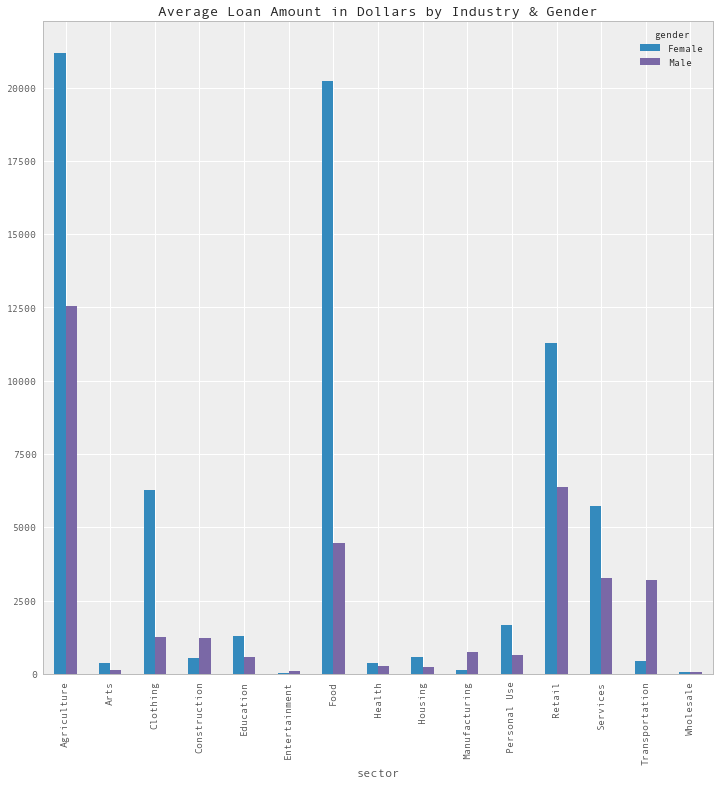

In [234]:
df[(df['borrower_count'] == 1)].groupby(['sector','gender'])['loan_amount'].count().unstack().reset_index().plot(kind='bar', x='sector', title="Average Loan Amount in Dollars by Industry & Gender",figsize=(12, 12))

In the chart above we look at raw number of loans given to females and males, but it may be more useful to look at this in terms of %. In the chart below we can see that there are a higher % of male loans in wholesale, transportation, manufacturing, entertainment and construction. In all other categories the % of female loans is higher.

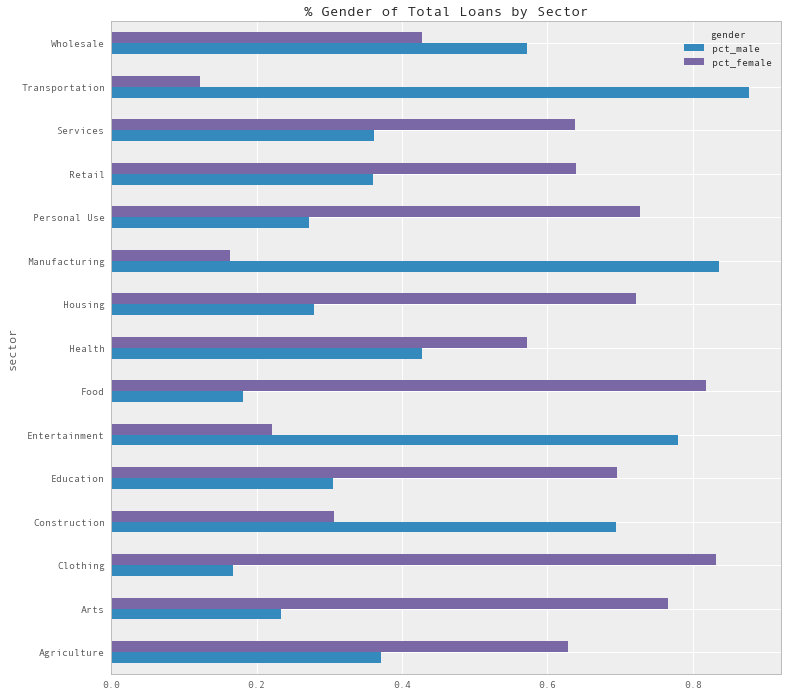

In [373]:
sector_by_gender = df[(df['borrower_count'] == 1)].groupby(['sector','gender']).size().unstack().reset_index()
sector_by_gender['total_count'] = (sector_by_gender['Male'] + sector_by_gender['Female'])
sector_by_gender['pct_female'] = sector_by_gender['Female'] / sector_by_gender['total_count'] 
sector_by_gender['pct_male'] = sector_by_gender['Male'] / sector_by_gender['total_count']

sector_by_gender[['sector','pct_male','pct_female']].plot(kind="barh", x="sector",title="% Gender of Total Loans by Sector",figsize=(12, 12))

Now, let us look at the loan amount requested in each sector by each gender. In the chart below, we see that our hypothesis that the difference was driven by natural price differences between industry is not correct. Men are asking for larger loan amounts in all industries, and the difference is highest in industries where they are not a majority. 

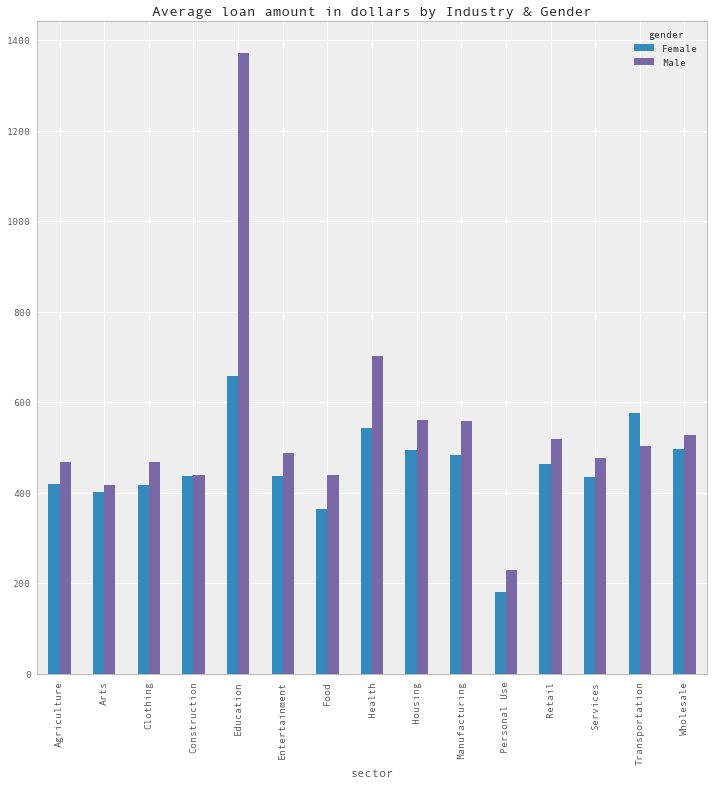

In [236]:
df[(df['borrower_count'] == 1)].groupby(['sector','gender'])['loan_amount'].mean().unstack().reset_index().plot(kind='bar', x='sector', title="Average loan amount in dollars by Industry & Gender",figsize=(12, 12))

Finally, let us take a look at the relationship between partner and gender.

In [400]:
partner_by_gender = df[(df['borrower_count'] == 1)].groupby(['partner_name','gender'])['loan_amount'].agg(['sum','count','mean','min']).unstack().reset_index()
partner_by_gender.head(2)


partner_by_gender['total_count'] = (partner_by_gender['sum']['Male'] + partner_by_gender['sum']['Female'])
partner_by_gender['pct_female'] = partner_by_gender['sum']['Female'] / partner_by_gender['total_count'] 
partner_by_gender['pct_male'] = partner_by_gender['sum']['Male'] / partner_by_gender['total_count']
partner_by_gender['partner_female'] = np.where(partner_by_gender['pct_female']>=.6, 'yes', 'no')
partner_by_gender[(partner_by_gender['pct_female']<=.2)].head(20) #moringa school appears!

partner_name      sum           count              mean  \
gender                            Female     Male Female  Male      Female   
0       Action Now: Kenya (ANK)  75625.0  51675.0  127.0  78.0  595.472441   
1       Asante Kenya Foundation  29000.0  20800.0   90.0  62.0  322.222222   

                      min         
gender        Male Female   Male  
0       662.500000   50.0   75.0  
1       335.483871  300.0  300.0

partner_name     sum           count          mean              \
gender                  Female     Male Female  Male  Female        Male   
22      Moringa School  6300.0  43250.0    3.0  21.0  2100.0  2059.52381   

           min         total_count pct_female  pct_male partner_female  
gender  Female    Male                                                  
22      1900.0  1250.0     49550.0   0.127144  0.872856             no

Surprisingly, the chart below suggests that although women ask for less, they have a higher funded rate.Is this because they ask for less or because they are women? 

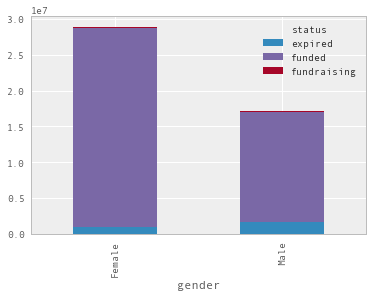

In [136]:
df[(df['borrower_count'] == 1)].groupby(['gender', 'status'])['loan_amount'].sum().unstack().plot(kind="bar", stacked=True, )

## End of Exploratory Analysis... What Next?

We output our dataset so it is ready to use in our next module.

In [414]:
df.to_csv('~/intro_course_data_science_for_good/data/df_module_1.csv')

We have just completed the question and exploratory analysis where the goal is turning a vague question into a statistical one. A key goal of the exploratory analysis is to start quantifying relationship between variables.

![Journey of a Data Scientist](module_1_images/journey_data_scientist.png)

Next, we cover two very important stages:

**1) Modeling phase: Build rigorous models.**

**2) Validation phase: Grade the performance of your model.**

We prepare our Kiva data for a linear regression, and run linear regressions that attempt to answer what drives outcomes for KIVA borrowers:

1) **How much should I ask for on Kiva?**

2) **When will I receive my loan? (i.e. when will my loan be disbursed to me?)**
